<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
SLOAN DIGIT SKY SURVEY OF STAR AND XY AND QUASI STELLAR OBJECTS</h1>

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
LIBRARIES</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style("whitegrid")
import tensorflow as tf

In [2]:
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Evaluate LIBRARIES</h1>

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score,r2_score

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
ALL MODELS LIBRARIES</h1>

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
EXPLORATORY DATA ANALYSIS</h1>

In [5]:
data = pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv", skiprows=1)

In [6]:
data.head(2)

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237648704577142822,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3722360139651588096,STAR,-0.000009,3306,54922,491
1,1237648704577142859,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,363814405953054720,STAR,-0.000055,323,51615,541


In [7]:
data .shape

(10000, 18)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  int64  
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  uint64 
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(8), int64(8), object(1), uint64(1)
memory usage: 1.4+ MB


In [9]:
data.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [10]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.173967e+12,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237647e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995782e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237649e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389250e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237649e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237651e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237652e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468834e+18,5.353854,8410.000000,57481.000000,1000.000000


In [11]:
data['class'].value_counts()

class
GALAXY    4998
STAR      4152
QSO        850
Name: count, dtype: int64

In [12]:
col_names = data.columns.values
col_names

array(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun',
       'camcol', 'field', 'specobjid', 'class', 'redshift', 'plate',
       'mjd', 'fiberid'], dtype=object)

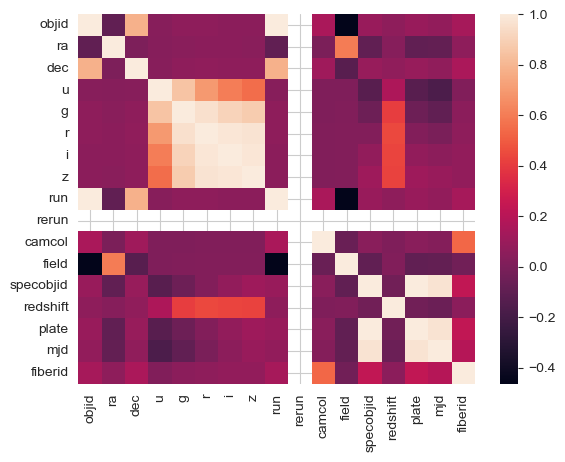

In [13]:
a = data.corr(numeric_only =True)
sns.heatmap(a)
plt.show()

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
DROP COLUMNS NOT CONTRIBUTING IN MODEL</h1>

In [14]:
data.drop(['objid','run', 'rerun','camcol', 'field', 'specobjid',], axis =1, inplace=True)

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
UNIVARIANT ANALYSIS</h1>

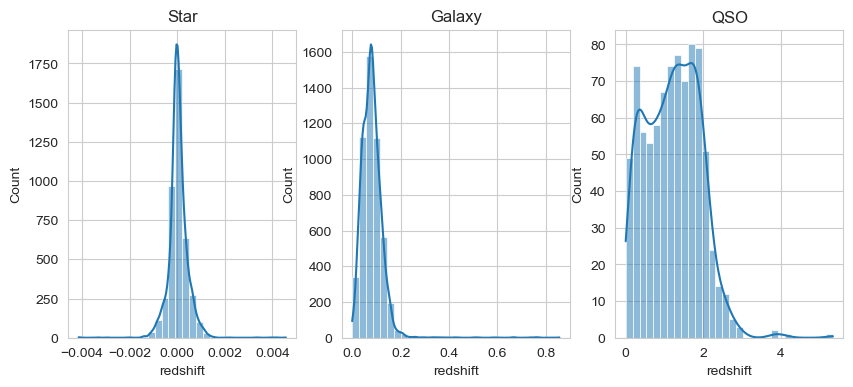

In [15]:
fig, axes = plt.subplots(1,3, figsize =(10, 4))
ax =sns.histplot(data[data['class']=='STAR'].redshift, bins =30, ax = axes[0], kde = True)
ax.set_title('Star')
ax =sns.histplot(data[data['class']=='GALAXY'].redshift, bins =30, ax= axes[1], kde = True)
ax.set_title('Galaxy')
ax =sns.histplot(data[data['class']=='QSO'].redshift, bins =30, ax= axes[2], kde = True)
ax.set_title('QSO')
plt.show()

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
1.STAR  has normal distribution<br>
2.Galaxy has center appox 0.075 distributed<br>
3.QSO has appox 0 to 3 distributed<br>
From above data distribution we can know that Star are more closer then th Galaxy and QSO</h1>

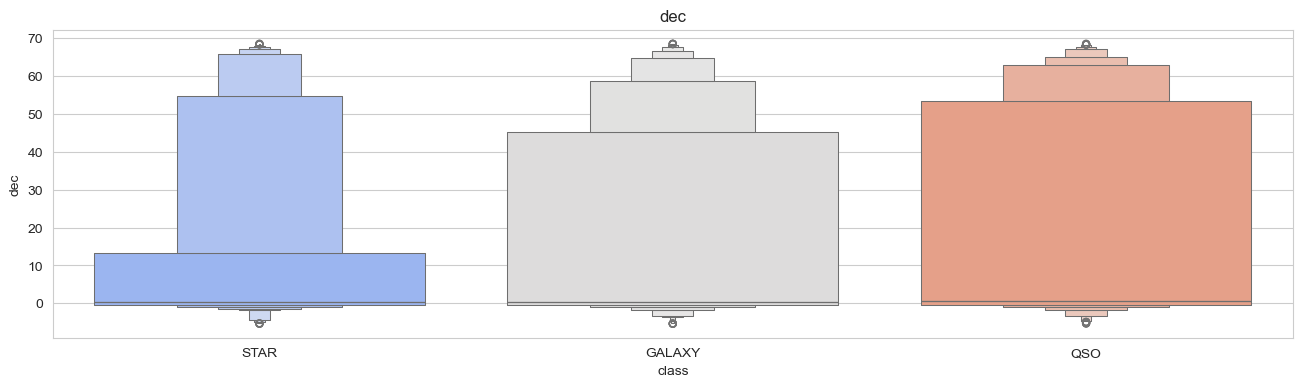

In [16]:
fig, axes =plt.subplots(1,1, figsize=(16,4))
ax = sns.boxenplot(x="class", y="dec", data=data, hue="class", 
                   palette="coolwarm", legend=False)
ax.set_title('dec')
plt.show()

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
The fact that the distribution of dec values of galaxies und quasar objects is almost the same might indicate that one can find both galaxies and quasars at smiliar positions in the night sky.</h1>

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Recall: u, g, r, i, z represent the different wavelengths which are used to capture the observations.
Let's find out how much they are correlated.</h1>

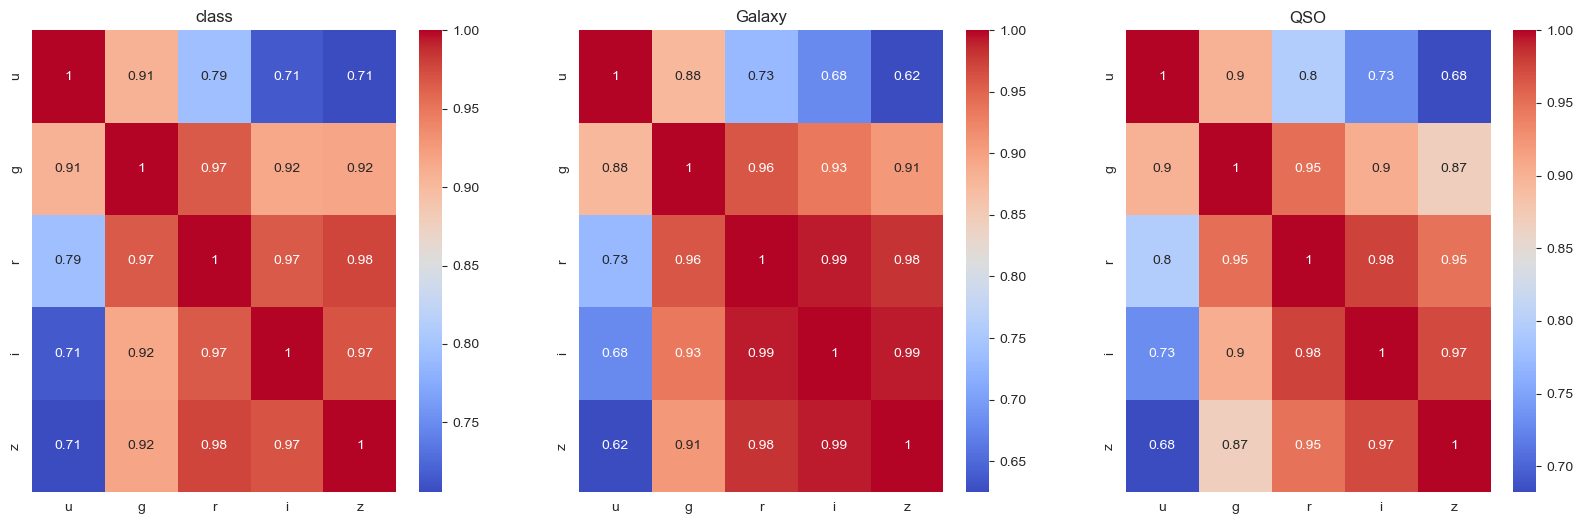

In [17]:
fig,ax = plt.subplots(1,3, figsize=(20,6), dpi=100)

sns.heatmap(data[data['class']=='STAR'][['u','g','r','i','z']].corr(),
            ax=ax[0], annot=True, cmap='coolwarm')
ax[0].set_title('class')

sns.heatmap(data[data['class']=='GALAXY'][['u','g','r','i','z']].corr(),
            ax=ax[1], annot=True, cmap='coolwarm')
ax[1].set_title('Galaxy')

sns.heatmap(data[data['class']=='QSO'][['u','g','r','i','z']].corr(),
            ax=ax[2], annot=True, cmap='coolwarm')
ax[2].set_title('QSO')


plt.show()

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Therefore it is interesting to see that band 'u' is less correlated to the other bands.
we can see - the correlation is roughly the same for every class...the different bands behave the same for the different classes </h1>

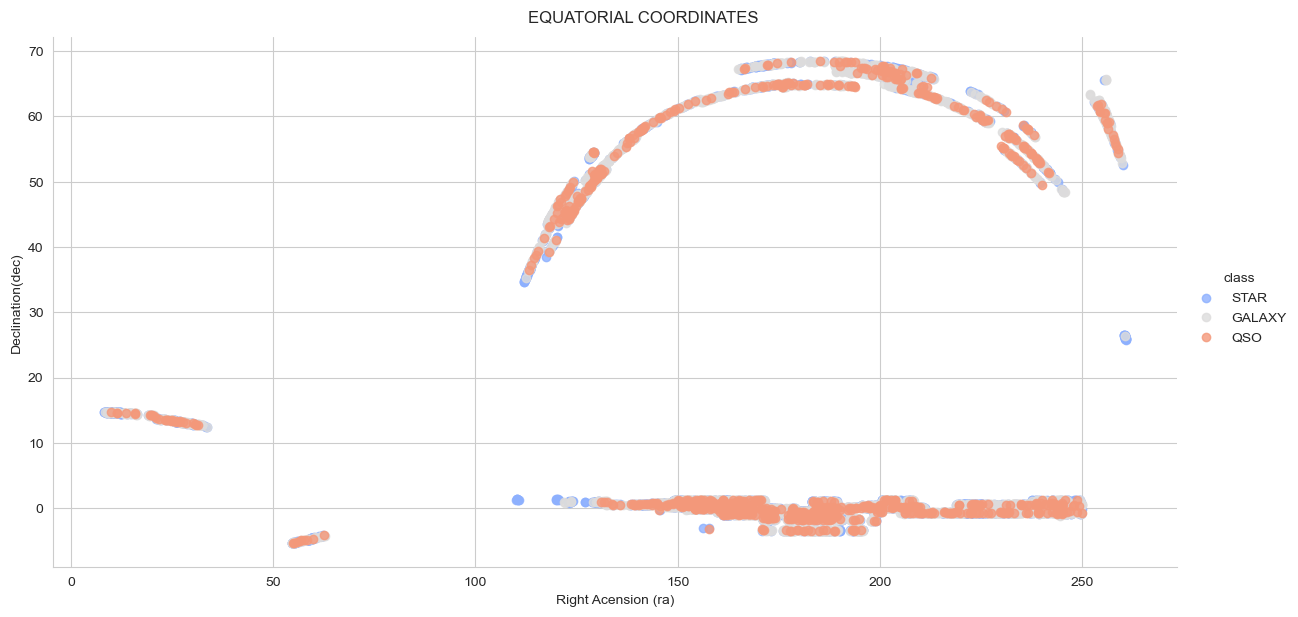

In [18]:
g = sns.lmplot(x='ra', y='dec',
               data=data, hue='class',
               
               fit_reg=False,
               palette='coolwarm',height=6, aspect=2)

g.set_axis_labels("Right Acension (ra)", "Declination(dec)")
g.fig.suptitle("EQUATORIAL COORDINATES", y=1.02)
plt.show()

<h1 style="font-family:Arial; font-size:20px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
As we can clearly observe the equatorial coordinates do not differ significantly between the 3 classes<br>
All SDSS images cover the same area of the sky. The plot above tells us that stars, galaxies and quasars are observed equally at all coordinates within this area. So whereever the SDSS "looks" - the chance of observing a star or galaxy or quasar is always the same.

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
FEATURE ENGINEERING</h1>

In [19]:
data1 = data.copy()

In [20]:
le = LabelEncoder()
y_encoded = le.fit_transform(data1['class'])
data1['class']=y_encoded

In [21]:
pca = PCA(n_components=3)
ugriz = pca.fit_transform(data1[['u','g','r','i','z']])

In [22]:
data1 = pd.concat((data1, pd.DataFrame(ugriz)),axis= 1)

In [23]:
data1.rename({0:'PCA_1', 1 :' PCA_2', 2 : 'PCA_3'}, axis=1, inplace =True)

In [24]:
data1.head(2)

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid,PCA_1,PCA_2,PCA_3
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,2,-0.000009,3306,54922,491,-1.507202,1.377293,-0.265119
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,2,-0.000055,323,51615,541,-0.195758,0.028410,-0.155695


In [25]:
data1.drop(['u','g','r','i','z'], axis =1 , inplace =True)

In [26]:
data1.head(2)

,ra,dec,class,redshift,plate,mjd,fiberid,PCA_1,PCA_2,PCA_3
0,183.531326,0.089693,2,-0.000009,3306,54922,491,-1.507202,1.377293,-0.265119
1,183.598371,0.135285,2,-0.000055,323,51615,541,-0.195758,0.028410,-0.155695


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
DATA PREPARATION FOR MODELLING SCALING</h1>

In [27]:
scaler = MinMaxScaler()
x = scaler.fit_transform(data1.drop('class', axis =1))

In [28]:
x_train,x_test,y_train,y_test = train_test_split(data1, data1['class'],test_size =0.33)

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">KNEIGHBORSCLASSIFIER TRAINING</h1>

In [29]:
knn = KNeighborsClassifier()

In [30]:
training_start = time.perf_counter()
knn.fit(x_train,y_train)
training_end = time.perf_counter()
knn_train_time = training_end - training_start

<h1 style="font-family:Arial; font-size:20px; color:#2C3E50; text-align:LEFT; background-color:#ECF0F1; padding:10px; border-radius:10px;">KNEIGHBORSCLASSIFIER PREDICTION</h1>

In [31]:
prediction_start = time.perf_counter()
preds  = knn.predict(x_test)
prediction_end = time.perf_counter()
knn_prediction_time = prediction_end - prediction_start

<h1 style="font-family:Arial; font-size:20px; color:#2C3E50; text-align:LEFT; background-color:#ECF0F1; padding:10px; border-radius:10px;">KNEIGHBORSCLASSIFIER EVALUTION AND TIME TAKEN FOR TRAIN AND PREDICT</h1>

In [32]:
acc_knn = (preds == y_test).sum().astype(float)/len(preds)*100
print("knn classifier accuracy is : %3.2f" % (acc_knn))
print("Time consumed for training : %4.3f seconds" % (knn_train_time))
print("Time consumed for training : %6.5f seconds" % (knn_prediction_time))

knn classifier accuracy is : 77.97
Time consumed for training : 0.029 seconds
Time consumed for training : 0.24396 seconds


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">GAUSSIAN NAIVE BAYES</h1>

In [33]:
gbn = data.copy()
gnb = GaussianNB()

In [34]:
from sklearn.preprocessing import MaxAbsScaler
scaler_gnb = MaxAbsScaler()
x = scaler_gnb.fit_transform(gbn.drop('class', axis = 1))

<h1 style="font-family:Arial; font-size:20px; color:#2C3E50; text-align:LEFT; background-color:#ECF0F1; padding:10px; border-radius:10px;">GAUSSIAN NAIVE BAYES TRAINING</h1>

In [35]:
x_trian_gnb,x_test_gnb,y_train_gnb,y_test_gnb = train_test_split(x, gbn['class'], test_size =0.33)
trianing_start = time.perf_counter()
gnb.fit(x_trian_gnb, y_train_gnb)
training_end = time.perf_counter()

<h1 style="font-family:Arial; font-size:20px; color:#2C3E50; text-align:LEFT; background-color:#ECF0F1; padding:10px; border-radius:10px;">GAUSSIAN NAIVE BAYES PREDICTION</h1>

In [36]:
prediction_start = time.perf_counter()
pred = gnb.predict(x_test_gnb)
prediction_end = time.perf_counter()

<h1 style="font-family:Arial; font-size:20px; color:#2C3E50; text-align:LEFT; background-color:#ECF0F1; padding:10px; border-radius:10px;">GAUSSIAN NAIVE BAYES EVALUTION AND TIME TAKEN FOR TRAIN AND PREDICT</h1>

In [37]:
acc_gnb = (pred == y_test_gnb).sum().astype(float)/ len(preds)*100
gbn_train_time = training_end - trianing_start
gbn_pred_time = prediction_end -  prediction_start 
print(acc_gnb)
print(gbn_train_time)
print(gbn_pred_time)

96.87878787878788
0.01799270004266873
0.0037561000208370388


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">XGBOOST CLASSIFIER TRAINING</h1>

In [38]:
xgb = XGBClassifier(n_estimators =100)
trianing_start = time.perf_counter()
xgb.fit(x_train, y_train)
training_end = time.perf_counter()
gbn_train_time = training_end - trianing_start

<h1 style="font-family:Arial; font-size:20px; color:#2C3E50; text-align:LEFT; background-color:#ECF0F1; padding:10px; border-radius:10px;">XGBOOST PREDICTION</h1>

In [39]:
prediction_start = time.perf_counter()
pred = xgb.predict(x_test)
prediction_end = time.perf_counter()
gbn_pred_time = prediction_end -  prediction_start 

<h1 style="font-family:Arial; font-size:20px; color:#2C3E50; text-align:LEFT; background-color:#ECF0F1; padding:10px; border-radius:10px;">XGBOOST EVALUTION</h1>

In [40]:
acc_xgb = (pred == y_test).sum().astype(float)/len(pred)*100
score_2 = r2_score(y_test, pred)
print(score_2)
print(acc_xgb)
print(gbn_train_time)
print(gbn_pred_time)

0.9996659673913318
99.96969696969697
0.23030629998538643
0.005147999967448413


In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, x_train,y_train, cv =10, scoring = 'accuracy')
print('scores:', scores)
print('Mean:', scores.mean())
print("standarad Deviation", scores.std())

scores: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99850746]
Mean: 0.9998507462686567
standarad Deviation 0.00044776119402983866


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;"> We training our data with 3 model KNN, XGBOOST, GAUSSIAN  using PCA we acheived xgboost with 99.96 accuracy</h1>